In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt 

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
# User-defined modules
from financial_data import *

In [30]:
comb = load_combined()
print(comb.head())

   loan_date  loan_amount  duration  payments status frequency account_date  \
0 1994-01-05     0.129680      0.25  0.319488      A   monthly   1993-02-26   
1 1996-04-29     0.043179      0.00  0.231001      B   monthly   1995-04-07   
2 1997-12-08     0.043179      0.00  0.231001      A   monthly   1996-07-28   
3 1998-10-14     0.535129      1.00  0.520924      D   monthly   1997-08-18   
4 1998-04-19     0.180520      0.75  0.208516      C    weekly   1997-08-08   

   clients  num_cards card_issued  ...  \
0        2          0  1900-01-01  ...   
1        1          0  1900-01-01  ...   
2        1          0  1900-01-01  ...   
3        1          0  1900-01-01  ...   
4        1          0  1900-01-01  ...   

  no_of_municipalities_with_inhabitants_between_1000_to_9999  \
0                                               0.00           
1                                               0.35           
2                                               0.90           
3               

In [31]:
# ML systems work with integers, we need to encode these string characters into ints
encoder = LabelEncoder()

#now apply transformation to all the columns:

for col in comb.columns:
    comb[col] = encoder.fit_transform(comb[col])
    
X_features = comb.iloc[:, comb.columns != 'status']
y_label = comb.status



In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=0)
print(X_train.shape)

(545, 32)


In [33]:
#scale the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#X_test = pca.transform(X_test)


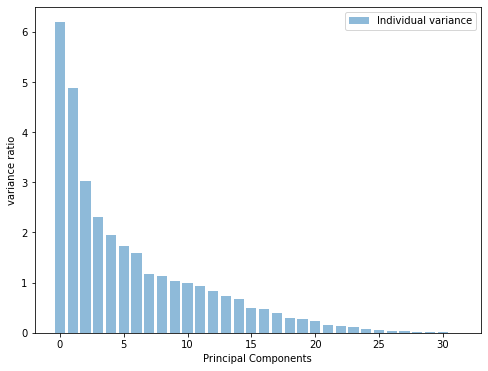

In [34]:
# visualize the varience to know how many components needs to be keep

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
pca_variance = pca.explained_variance_   

plt.figure(figsize=(8,6))
plt.bar(range(32), pca_variance, alpha=0.5, align='center', label='Individual variance')
plt.legend()
plt.ylabel('variance ratio')
plt.xlabel('Principal Components')
plt.show()

#### According to this varience figure, it seems like we can keep about 22 components.

In [35]:
#keep 22 components and try to evaluate performance
pca = PCA(n_components=22)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#### apply random forest on 22 components

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(max_depth=3, random_state=0)
rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)

#### performance evaluation for 22 components

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[16  0 12  0]
 [ 4  0  4  0]
 [ 3  0 92  0]
 [ 0  0  6  0]]
0.7883211678832117


#### keep 15 components and evaluate performance with same model

In [38]:
# Let's try to use 15 principal component to train our algorithm. To do so, execute the following code:

from sklearn.decomposition import PCA

pca = PCA(n_components=15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#print(X_test)

#### now let's apply random forest classification to make predictions

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(max_depth=3, random_state=0)
rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)


#### Let's do performance evaluation

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[18  0 10  0]
 [ 4  0  4  0]
 [ 4  0 91  0]
 [ 0  0  6  0]]
0.7956204379562044


#### keep 10 components and evaluate performance with same model

In [41]:
pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [42]:
rf_classifier = RandomForestClassifier(max_depth=3, random_state=0)
rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[18  0 10  0]
 [ 5  0  3  0]
 [ 6  0 89  0]
 [ 0  0  6  0]]
0.781021897810219


#### keep 5 components and evaluate performance with same model

In [43]:
pca = PCA(n_components=5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [44]:
rf_classifier = RandomForestClassifier(max_depth=3, random_state=0)
rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[17  0 11  0]
 [ 4  0  4  0]
 [17  0 78  0]
 [ 2  0  4  0]]
0.6934306569343066


#### keep 1 components and evaluate performance with same model

In [45]:
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [46]:
rf_classifier = RandomForestClassifier(max_depth=3, random_state=0)
rf_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = rf_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[ 2  0 26  0]
 [ 1  0  7  0]
 [ 2  0 93  0]
 [ 1  0  5  0]]
0.6934306569343066
